# Example Visualize Filters and Feature Maps in Convolutional Neural Networks

In [1]:
from tensorflow.keras.applications.mobilenet import  MobileNet
model = MobileNet()
model.summary()

17235968/17225924 [==============================] - 11s 1us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 3

In [2]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 conv1 (None, 112, 112, 32)
2 conv1_bn (None, 112, 112, 32)
3 conv1_relu (None, 112, 112, 32)
4 conv_dw_1 (None, 112, 112, 32)
5 conv_dw_1_bn (None, 112, 112, 32)
6 conv_dw_1_relu (None, 112, 112, 32)
7 conv_pw_1 (None, 112, 112, 64)
8 conv_pw_1_bn (None, 112, 112, 64)
9 conv_pw_1_relu (None, 112, 112, 64)
10 conv_pad_2 (None, 113, 113, 64)
11 conv_dw_2 (None, 56, 56, 64)
12 conv_dw_2_bn (None, 56, 56, 64)
13 conv_dw_2_relu (None, 56, 56, 64)
14 conv_pw_2 (None, 56, 56, 128)
15 conv_pw_2_bn (None, 56, 56, 128)
16 conv_pw_2_relu (None, 56, 56, 128)
17 conv_dw_3 (None, 56, 56, 128)
18 conv_dw_3_bn (None, 56, 56, 128)
19 conv_dw_3_relu (None, 56, 56, 128)
20 conv_pw_3 (None, 56, 56, 128)
21 conv_pw_3_bn (None, 56, 56, 128)
22 conv_pw_3_relu (None, 56, 56, 128)
23 conv_pad_4 (None, 57, 57, 128)
24 conv_dw_4 (None, 28, 28, 128)
25 conv_dw_4_bn (None, 28, 28, 128)
26 conv_dw_4_relu (None, 28, 28, 128)
27 conv_pw_4 (None, 28, 28, 256)
28 conv_pw_4_bn (None, 28, 28, 256)
29 conv_pw_4_relu (No

In [8]:
lst = [9, 16, 22, 29, 35, 42, 48, 54, 60, 66, 72, 79, 84]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

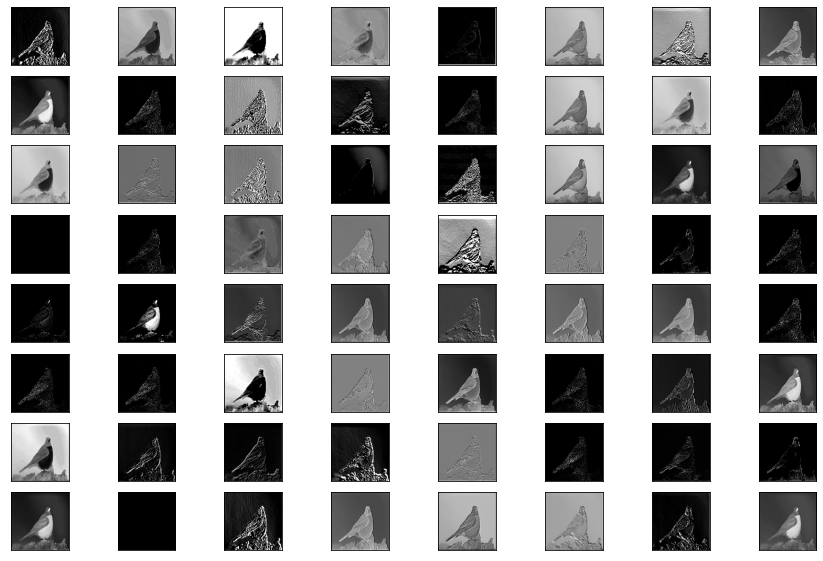

In [5]:
from tensorflow.keras.applications.mobilenet import  MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

def display(feature_image):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_"
    # plt.savefig(filename+"nam.png")
    plt.show()

def main():
    model = MobileNet()
    model = Model(inputs=model.inputs, outputs=model.layers[9].output)
    model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    feature_map = model.predict(img)
    display(feature_map)
if __name__ == "__main__":
    main()

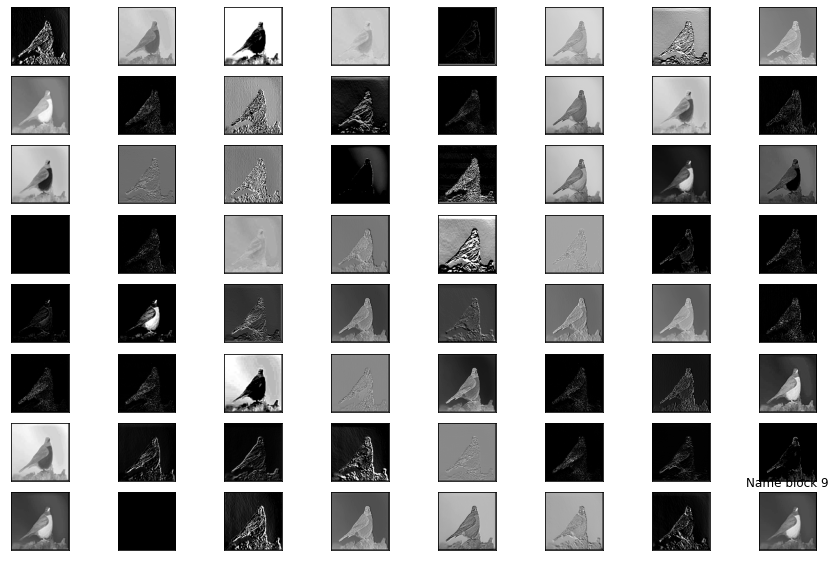

Anh so 9


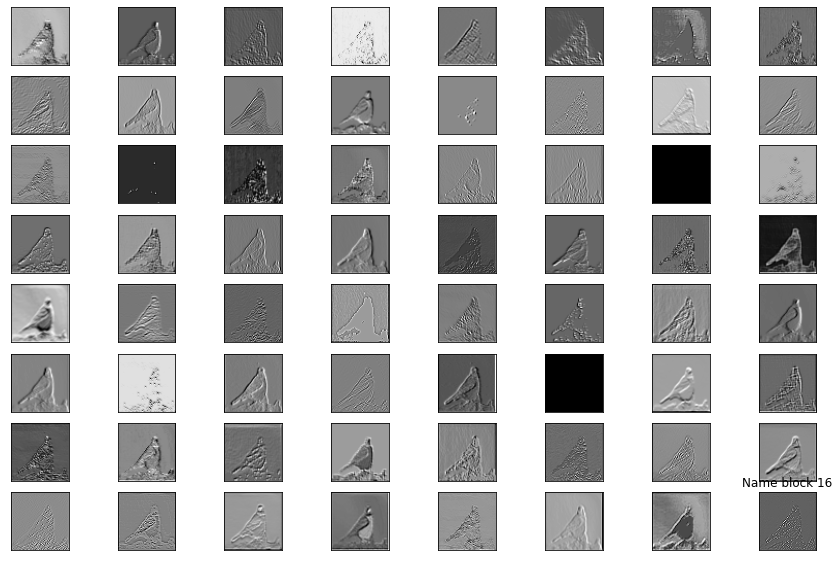

Anh so 16


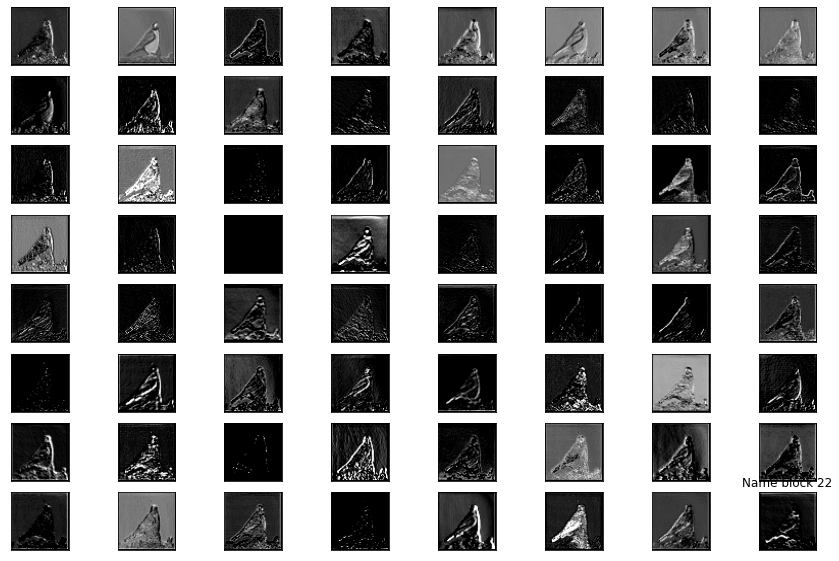

Anh so 22


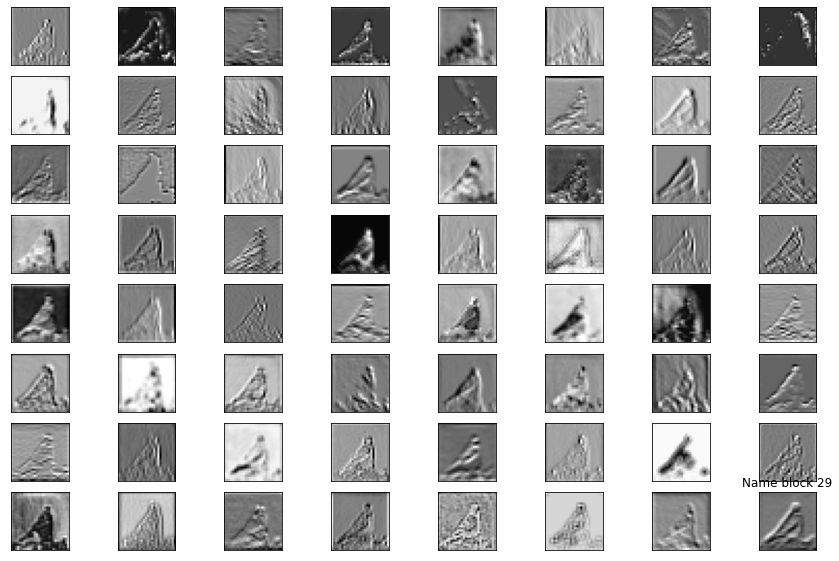

Anh so 29


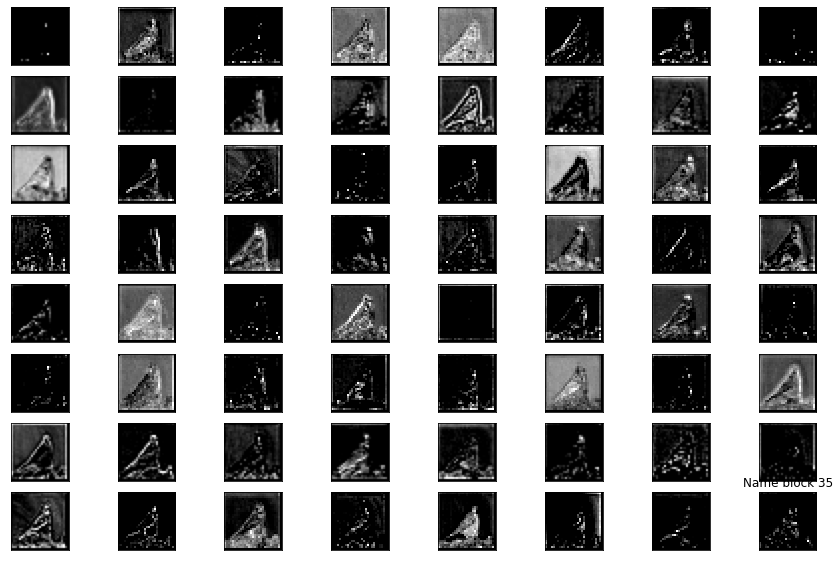

Anh so 35


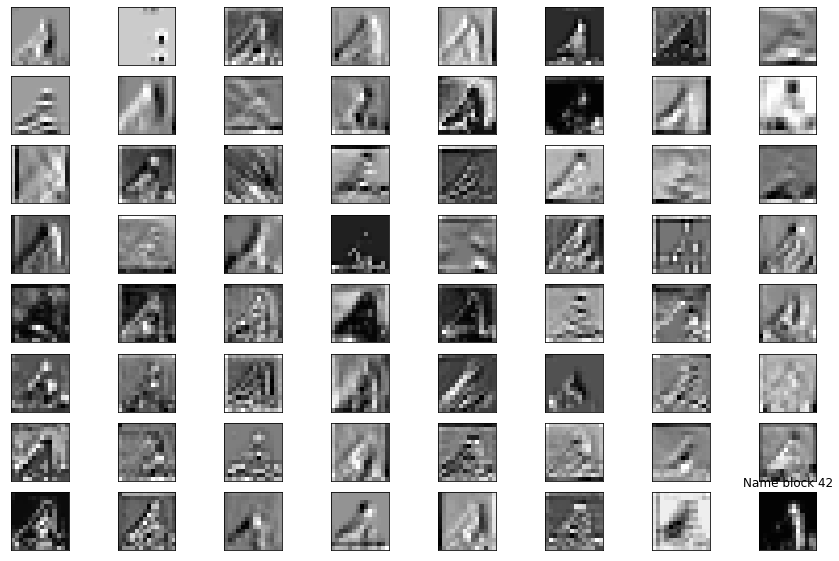

Anh so 42


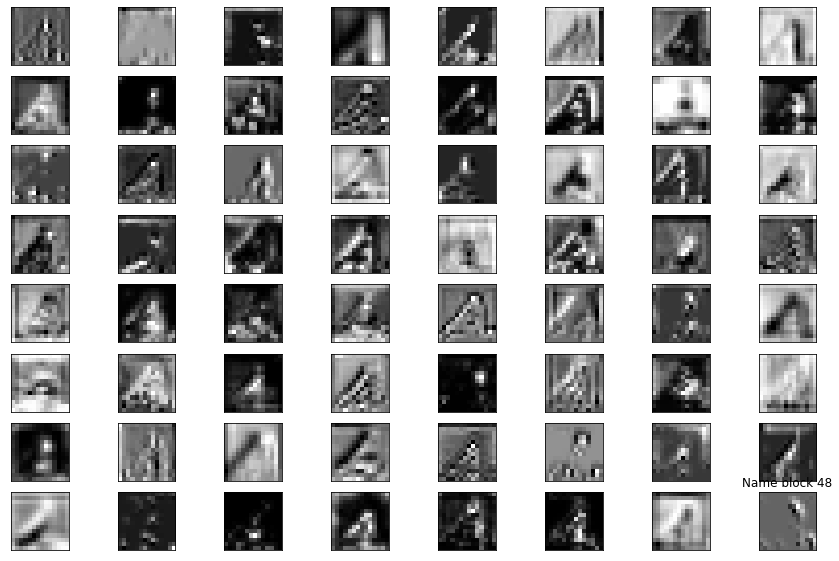

Anh so 48


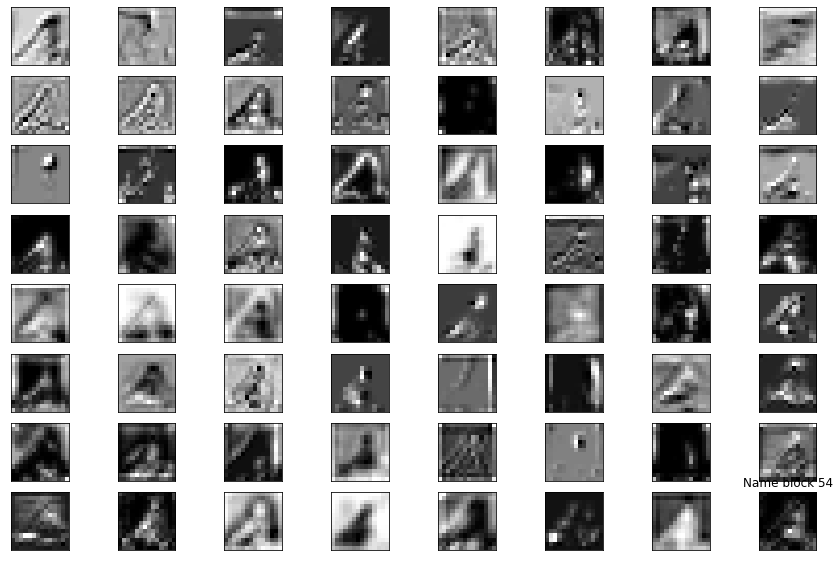

Anh so 54


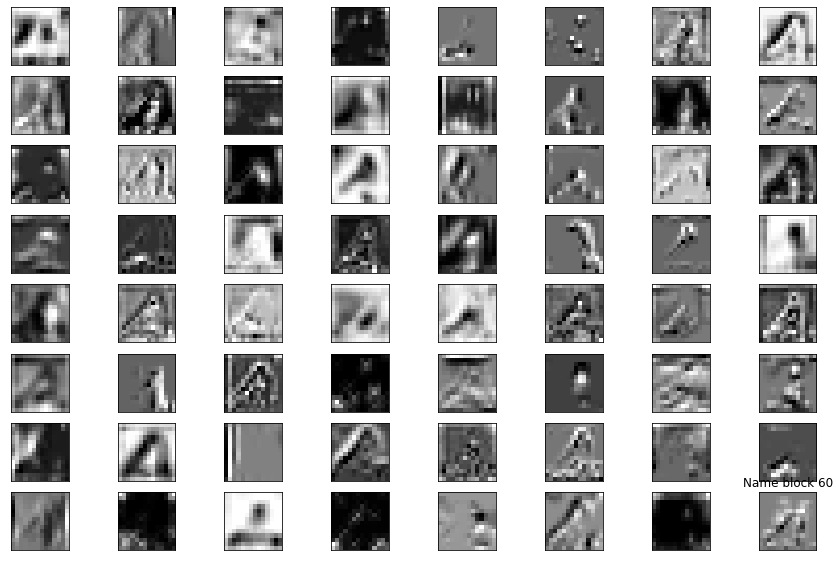

Anh so 60


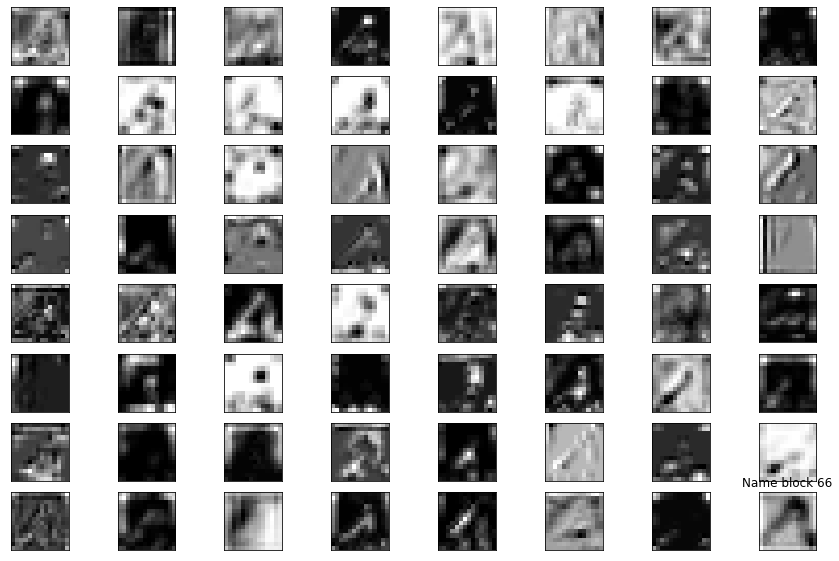

Anh so 66


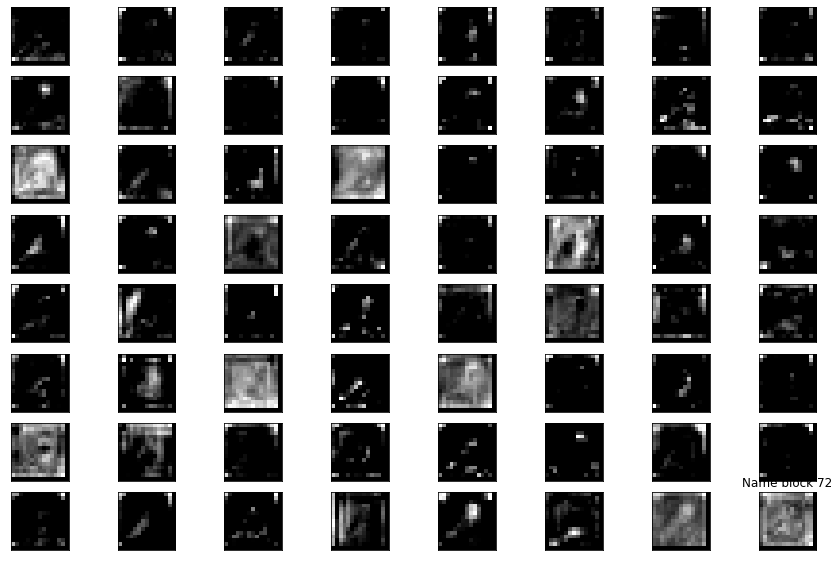

Anh so 72


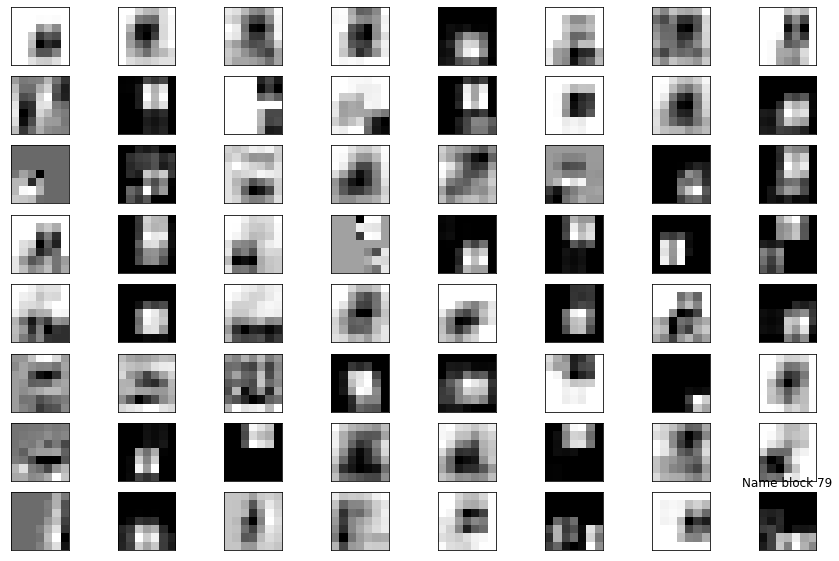

Anh so 79


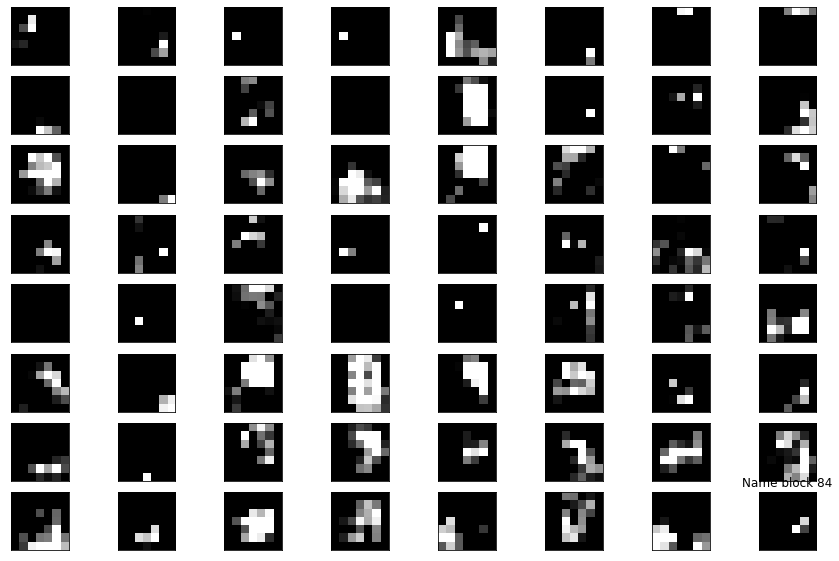

Anh so 84


In [9]:
from tensorflow.keras.applications.mobilenet import  MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import matplotlib.pyplot as plt 

def display(feature_image, name_file):
    plt.figure(figsize=(15, 10))
    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter chanel  in grayscale
            plt.imshow(feature_image[0, :,:, ix-1],cmap = 'gray')
            ix +=1
    # filename= "Image/femp_{}_".format(name_file)
    # plt.savefig(filename+"nam.png")
    plt.title("Name block {}".format(name_file))
    plt.show()

def main():
    model = MobileNet()
    ixs = lst
    outputs = [model.layers[i+1].output for i in ixs]
    model = Model(inputs=model.inputs, outputs=outputs)
    # model.summary()
    img = load_img("ImageInput/bird.jpg", target_size=(224, 224))
    # Convert imge to array
    img = img_to_array(img)
    # expand image dismentio to  "sample" dim.
    img = expand_dims(img, axis=0)
    # scale pixel valye for the vgg 
    img = preprocess_input(img)
    # get feature map for first hiddent layer.
    fe_map = model.predict(img)
    its = 0
    for feature_map in fe_map:
        display(feature_map, ixs[its])
        print("Anh so {}".format(ixs[its]))
        its += 1
if __name__ == "__main__":
    main()